<a href="https://colab.research.google.com/github/k18a/tesorflow_projects/blob/master/Datasets_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis of the Fashion-MNIST Dataset

The Fashion-MNIST dataset consists of a labelled set of images of clothing articles from the high street outlet Zalando. It can be found here: https://github.com/zalandoresearch/fashion-mnist. 

The Fashnion MNIST dataset seeks to replace the original MNIST dataset of handwritten digits, as the first stop to test classification algorithms. Like the MNIST dataset, it has 10 labels - 10 different articles of clothing, 60,000 training images, and 10,000 test images. The labels are as follows: 
- 0	T-shirt/top
- 1	Trouser
- 2	Pullover
- 3	Dress
- 4	Coat
- 5	Sandal
- 6	Shirt
- 7	Sneaker
- 8	Bag
- 9	Ankle boot

In [1]:
# import packages
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
print('tensorflow version: {}'.format(tf.__version__))
print('keras version: {}'.format(keras.__version__))

tensorflow version: 2.3.0
keras version: 2.4.0


MNIST Image classifier using Keras

In [8]:
# load data
(X_total, y_total), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [1]:
# look at data
print('training data:\n')
print('min:{}\nmax:{}\nmean:{}'.format(X_total.min(),X_total.max(),X_total.mean()))
print('\ntraining labels:\n')
print('shape: {}\ndatatype: {}'.format(y_total.shape, y_total.dtype))
print('min:{}\nmax:{}\nmean:{}\n'.format(y_total.min(),y_total.max(),y_total.mean()))
print('testing data:\n')
print('shape: {}\ndatatype: {}'.format(X_test.shape, X_test.dtype))
print('min:{}\nmax:{}\nmean:{}'.format(X_test.min(),X_test.max(),X_test.mean()))
print('\ntesting labels:\n')
print('shape: {}\ndatatype: {}'.format(y_test.shape, y_test.dtype))
print('min:{}\nmax:{}\nmean:{}'.format(y_test.min(),y_test.max(),y_test.mean()))

training data:



NameError: ignored

There are 60,000 images in the training dataset, and 10,000 images in the testing dataset. Each image has 28 x 29 pixels. Each pixel has a value between 0 and 255 - they are greyscale. Also, there are 0 labels in total. From the documentation, we know that these are as follows:



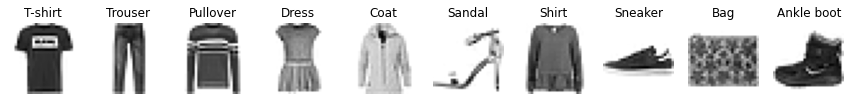

In [14]:
# class names for mnist dataset 
class_names = {
    0:'T-shirt',
    1:'Trouser',
    2:'Pullover',
    3:'Dress',
    4:'Coat',
    5:'Sandal',
    6:'Shirt',
    7:'Sneaker',
    8:'Bag',
    9:'Ankle boot'
}
# plot figure
figure, axes = plt.subplots(nrows = 1, ncols= 10,figsize=(15,2))
for i in range(10):
  index = np.where(y_total==i)[0][0]
  axes[i].imshow(X_total[index,:,:],cmap='gray_r')
  axes[i].title.set_text(class_names[i])
  axes[i].axis('off')

In [ ]:
# split into training and validation data, scale them, and convert them to float
X_valid, X_train = X_train_full[:5000]/255.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [ ]:
# look at resulting training dataset
print('training data:\n')
print('shape: {}\ndatatype: {}'.format(X_train.shape, X_train.dtype))
print('min:{}\nmax:{}\nmean:{}'.format(X_train.min(),X_train.max(),X_train.mean()))
print('\ntraining labels:\n')
print('shape: {}\ndatatype: {}'.format(y_train.shape, y_train.dtype))
print('min:{}\nmax:{}\nmean:{}'.format(y_train.min(),y_train.max(),y_train.mean()))

training data:

shape: (55000, 28, 28)
datatype: float64
min:0.0
max:1.0
mean:0.28603097466259203

training labels:

shape: (55000,)
datatype: uint8
min:0
max:9
mean:4.5


In [ ]:
# set up Keras sequential model
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation='relu'))
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# compile model
model.compile(loss='sparse_categorical_crossentropy', # for sparse labels
              optimizer = 'sgd', # stochastic gradient descent
              metrics = ['accuracy'])

In [ ]:
# fit model
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.7252 - accuracy: 0.7623 - val_loss: 0.4890 - val_accuracy: 0.8398
Epoch 2/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.4878 - accuracy: 0.8293 - val_loss: 0.4707 - val_accuracy: 0.8318
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4448 - accuracy: 0.8434 - val_loss: 0.4100 - val_accuracy: 0.8590
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4149 - accuracy: 0.8534 - val_loss: 0.4059 - val_accuracy: 0.8552
Epoch 5/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3949 - accuracy: 0.8607 - val_loss: 0.3837 - val_accuracy: 0.8670
Epoch 6/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3795 - accuracy: 0.8642 - val_loss: 0.3689 - val_accuracy: 0.8708
Epoch 7/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.3657 - accuracy: 0.8710 - val_loss: 0.3579 - val_accuracy:

(0.0, 1.0)

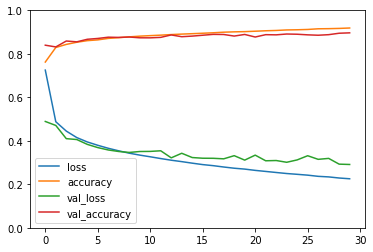

In [ ]:
# plot training and validation metrics during training
pd.DataFrame(history.history).plot()
plt.ylim([0,1])

- there seems to be an anamalous result in which validation accuracy is higher than training accuracy at epoch 0. this is because validation error is computed at the end of each epoch, whilst the training error is computed during each epoch, so the training error should be shifted by half an epoch to the left

In [ ]:
# evaluate model
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3348 - accuracy: 0.8817


[0.33476492762565613, 0.8816999793052673]

In [ ]:
model.predict(X_test[1:2,:,:]).round(2)

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
np.argmax(model.predict(X_test[1:2,:,:]).round(2),axis=-1)

array([2])